In [46]:
import pandas as pd

# Read x_train.txt
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None)

# Read y_train.txt
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None)


# Display the data
print("x:")
print(X.head())

print("\ny:")
print(y.head())


x:
        0         1         2         3         4         5         6    \
0 -2.619773 -2.619533 -1.199350 -1.083335 -1.000910 -0.366967 -2.164037   
1 -1.415579 -1.782544 -2.880270 -1.958863  1.159968  0.273030 -1.628728   
2 -2.745092 -1.382945 -1.626015 -1.282560 -0.663146  0.052349 -2.403322   
3  0.618998  0.455364 -0.115081  0.649040 -0.862207  2.308504  0.526114   
4 -0.070694 -0.550509 -0.565556 -0.693065 -0.573089 -0.395862  0.003170   

        7         8         9    ...        490        491        492  \
0 -1.210001 -0.658311 -1.489539  ...  10.849925  10.343346  10.717519   
1 -0.175813 -0.916857 -0.570166  ...  11.489417   5.195818   3.494627   
2 -0.765073 -0.394354 -0.806624  ...  13.934934   9.267515   4.705604   
3 -1.094852  1.088656 -0.481210  ...  12.021328   3.852231  11.059702   
4 -0.981609 -0.505775 -0.758430  ...   7.537788  11.229665  11.318915   

        493        494        495        496        497        498        499  
0  7.709295   5.894554  12.

In [47]:
idc1=[100,102,103,104,105,101]
idc2=[0, 100,102,103,104,105,101]
idc3=[0, 9, 100,102,103,104,105,101]#eyeballing the least correlated ones
idc4=[0, 9, 3,100,102,103,104,105,101] #eyeballing the least correlated ones

In [48]:
X1 = X.iloc[:, idc1]
X2 = X.iloc[:, idc2]
X3 = X.iloc[:, idc3]
X4 = X.iloc[:, idc4]

In [55]:
X1

,100,102,103,104,105,101
0,-0.915513,0.264032,-0.177042,-0.123621,1.049388,0.713780
1,-1.513469,1.071525,1.823868,0.083758,-1.191206,0.506429
2,-1.215839,-0.162820,0.771938,1.255190,-0.626576,-0.112797
3,1.167745,-1.572364,0.211630,3.029617,0.861478,0.777688
4,0.219875,0.702204,-0.455936,0.993229,-1.422561,0.579971
...,...,...,...,...,...,...
4995,-1.115238,0.518670,0.816333,-2.106221,0.268827,-0.041932
4996,-0.157643,0.083440,-2.198985,-0.392815,0.025449,0.098028
4997,0.412870,1.335438,-0.928147,-0.900783,0.473756,-1.730745
4998,0.406267,-0.237090,1.129644,0.005900,1.023475,0.568479


In [49]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
from xgboost import XGBClassifier

In [50]:
import numpy as np
#resdf = pd.DataFrame(columns=['accuracy1', 'accuracy2'])
rarr=[]
linspace_array = np.linspace(0.6, 0.8, num=20)
for i in linspace_array:
    #if i % 10 == 0:
    print(i)
    for j in range(30):
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=1 - i)
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=1 - i)
        X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=1 - i)
        X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=1 - i)
        model1 = XGBClassifier(device="cuda")
        model2 = XGBClassifier(device="cuda")
        model3 = XGBClassifier(device="cuda")
        model4 = XGBClassifier(device="cuda")
        model1.fit(X1_train, y1_train)
        model2.fit(X2_train, y2_train)
        model3.fit(X3_train, y3_train)
        model4.fit(X4_train, y4_train)
        y1_pred = model1.predict(X1_test)
        y2_pred = model2.predict(X2_test)
        y3_pred = model3.predict(X3_test)
        y4_pred = model4.predict(X4_test)
        #print(type(y1_pred), type(y1_test.to_numpy()))
        accuracy1 = accuracy_score(y1_test.to_numpy(), y1_pred)
        accuracy2 = accuracy_score(y2_test.to_numpy(), y2_pred)
        accuracy3 = accuracy_score(y3_test.to_numpy(), y3_pred)
        accuracy4 = accuracy_score(y4_test.to_numpy(), y4_pred)
        rarr.append({'i': i, 'accuracy1': accuracy1, 'accuracy2': accuracy2, 'accuracy3': accuracy3, 'accuracy4': accuracy4})
resdf = pd.DataFrame(rarr, columns=['i', 'accuracy1', 'accuracy2', 'accuracy3', 'accuracy4'])

0.6
0.6105263157894737
0.6210526315789473
0.631578947368421
0.6421052631578947
0.6526315789473685
0.6631578947368421
0.6736842105263158
0.6842105263157895
0.6947368421052632
0.7052631578947368
0.7157894736842105
0.7263157894736842
0.736842105263158
0.7473684210526316
0.7578947368421053
0.768421052631579
0.7789473684210526
0.7894736842105263
0.8


In [51]:
resdf = pd.DataFrame(rarr, columns=['i', 'accuracy1', 'accuracy2', 'accuracy3', 'accuracy4'])

In [52]:
resdf

,i,accuracy1,accuracy2,accuracy3,accuracy4
0,0.6,0.6380,0.6650,0.6630,0.6675
1,0.6,0.6595,0.6460,0.6595,0.6620
2,0.6,0.6625,0.6445,0.6550,0.6520
3,0.6,0.6640,0.6545,0.6580,0.6805
4,0.6,0.6510,0.6425,0.6540,0.6615
...,...,...,...,...,...
595,0.8,0.6430,0.6840,0.6370,0.6550
596,0.8,0.6750,0.6600,0.6650,0.6780
597,0.8,0.6730,0.6730,0.6920,0.6760
598,0.8,0.6500,0.6680,0.6820,0.6780


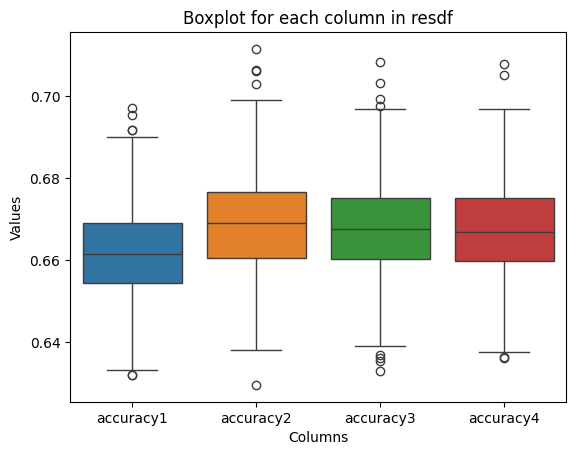

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each column in resdf
sns.boxplot(data=resdf[['accuracy1', 'accuracy2', 'accuracy3', 'accuracy4']])

# Set the title and labels
plt.title('Boxplot for each column in resdf')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

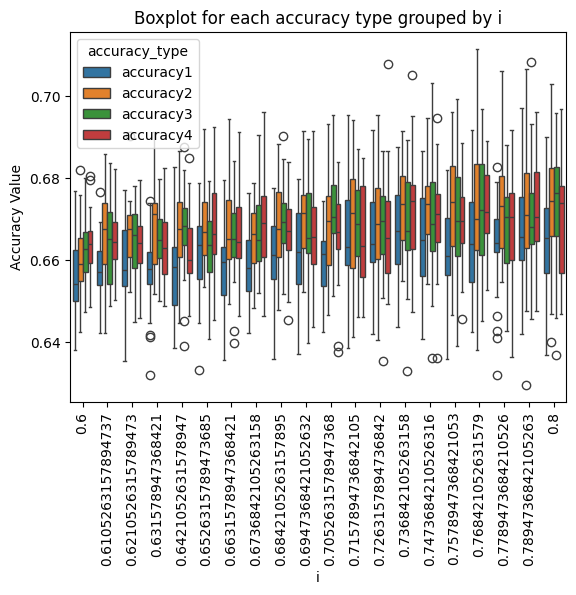

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data from wide format to long format
resdf_melted = pd.melt(resdf, id_vars='i', value_vars=['accuracy1', 'accuracy2', 'accuracy3', 'accuracy4'], var_name='accuracy_type', value_name='accuracy_value')

# Create a boxplot for each accuracy type grouped by i
sns.boxplot(x='i', y='accuracy_value', hue='accuracy_type', data=resdf_melted)

# Set the title and labels
plt.title('Boxplot for each accuracy type grouped by i')
plt.xlabel('i')
plt.ylabel('Accuracy Value')

plt.xticks(rotation=90)

# Show the plot
plt.show()